# wine Quality

## Context 🍇
The two datasets are related to the red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistical issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g., there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g., there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality, I just shared it to Kaggle for convenience. (If I am mistaken and the public license type disallowed me from doing so, I will take this down if requested).

## Content 📝
For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol
Output variable (based on sensory data):
12. Quality (score between 0 and 10)




# ETL

In [217]:
import pandas as pd

In [218]:
df = pd.read_csv('archive/winequality-red.csv')

In [219]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# EDA

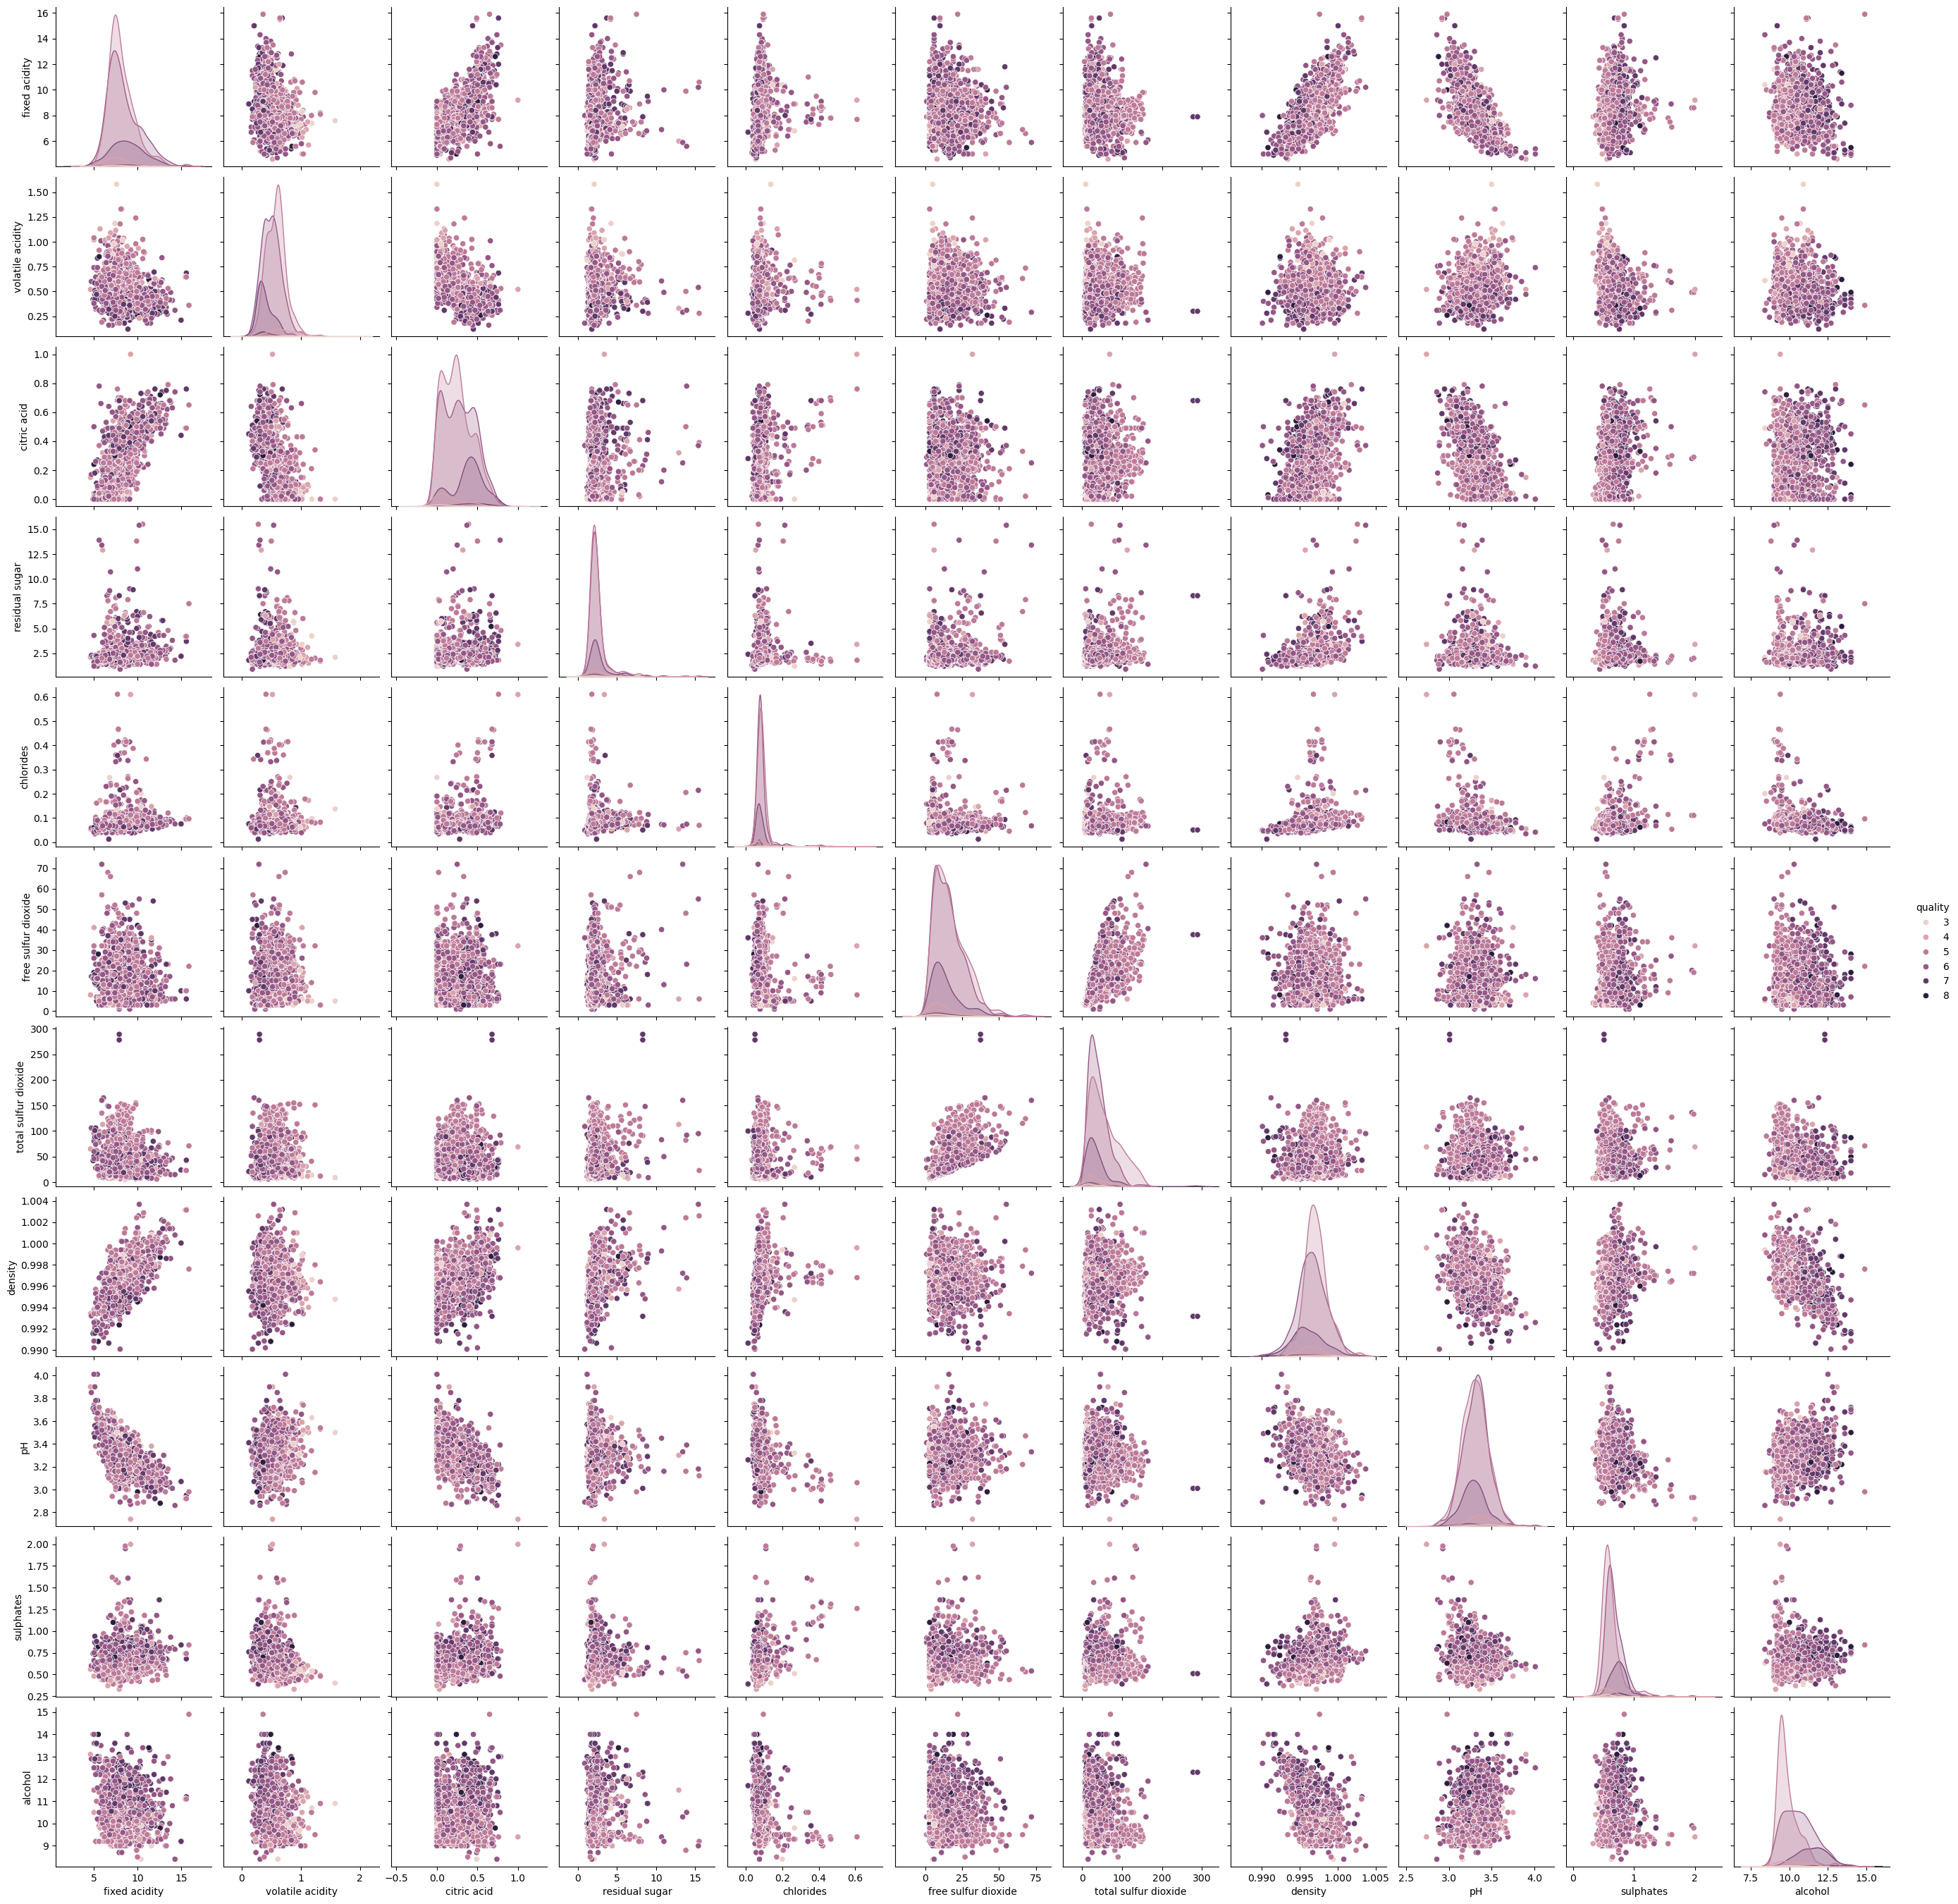

In [221]:
import seaborn as sns

sns.pairplot(
    data= df,
    hue= 'quality'
)

<Axes: xlabel='quality', ylabel='count'>

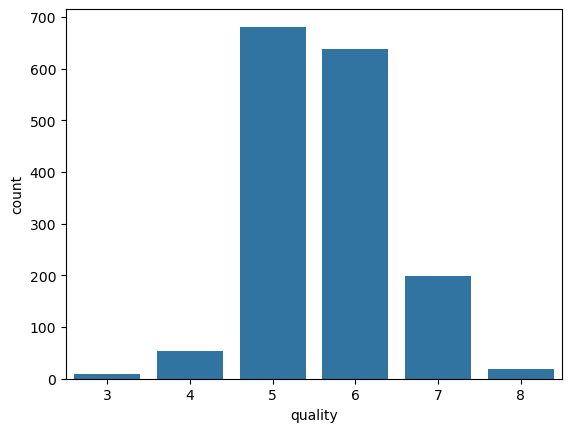

In [222]:
sns.countplot(
    data=df,
    x='quality'

)

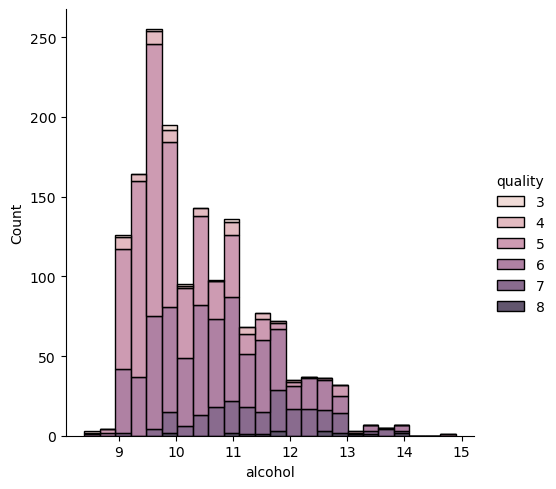

In [223]:
sns.displot(
    data=df,
    hue='quality',
    x='alcohol',
    multiple= 'stack'

)

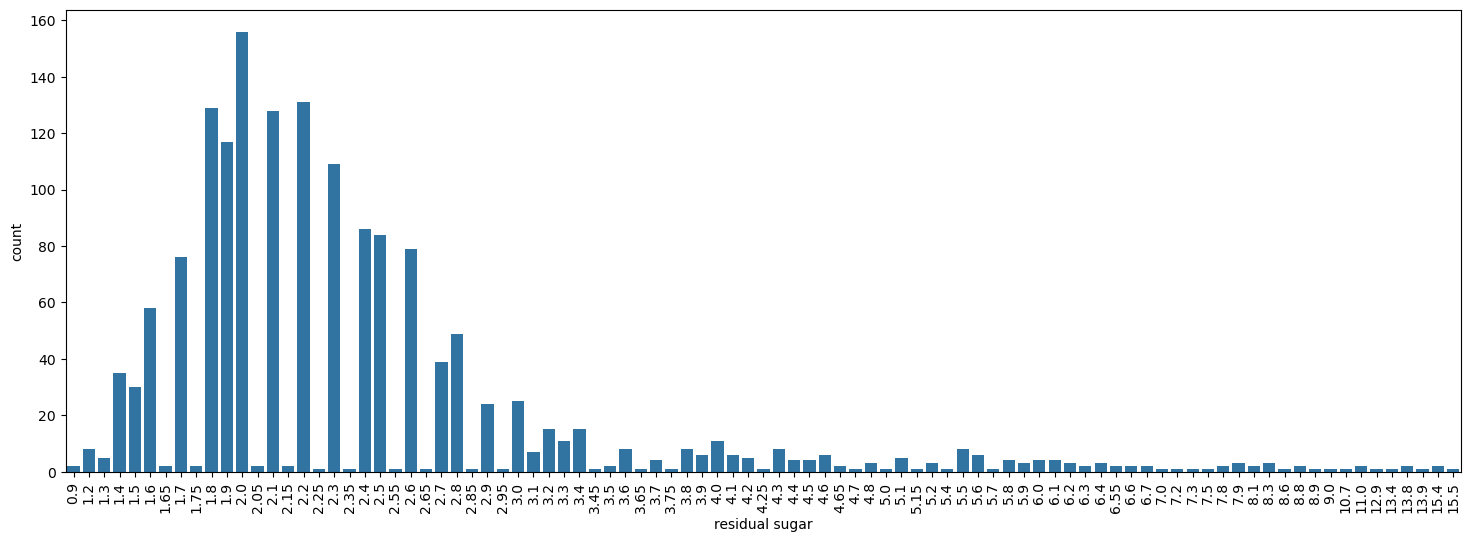

In [224]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))  

sns.countplot(
    data=df,
    x='residual sugar'
)
plt.xticks(rotation=90)
plt.show()

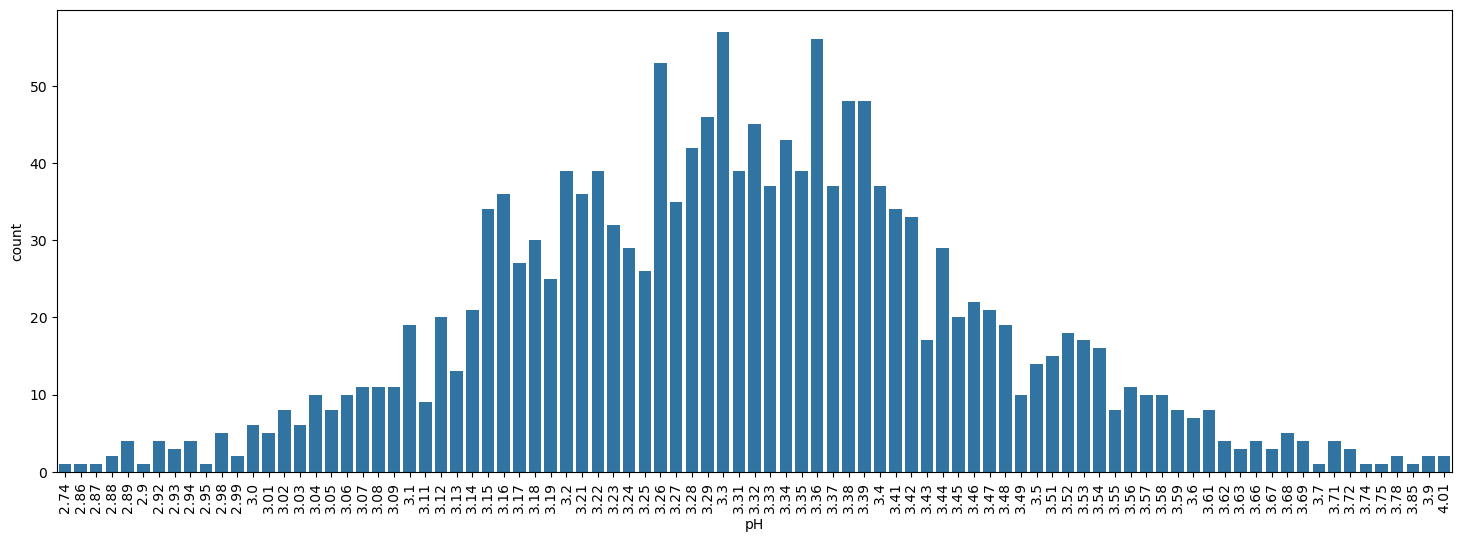

In [225]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6)) 
sns.countplot(
    data=df,
    x='pH'
)

plt.xticks(rotation=90)
plt.show()

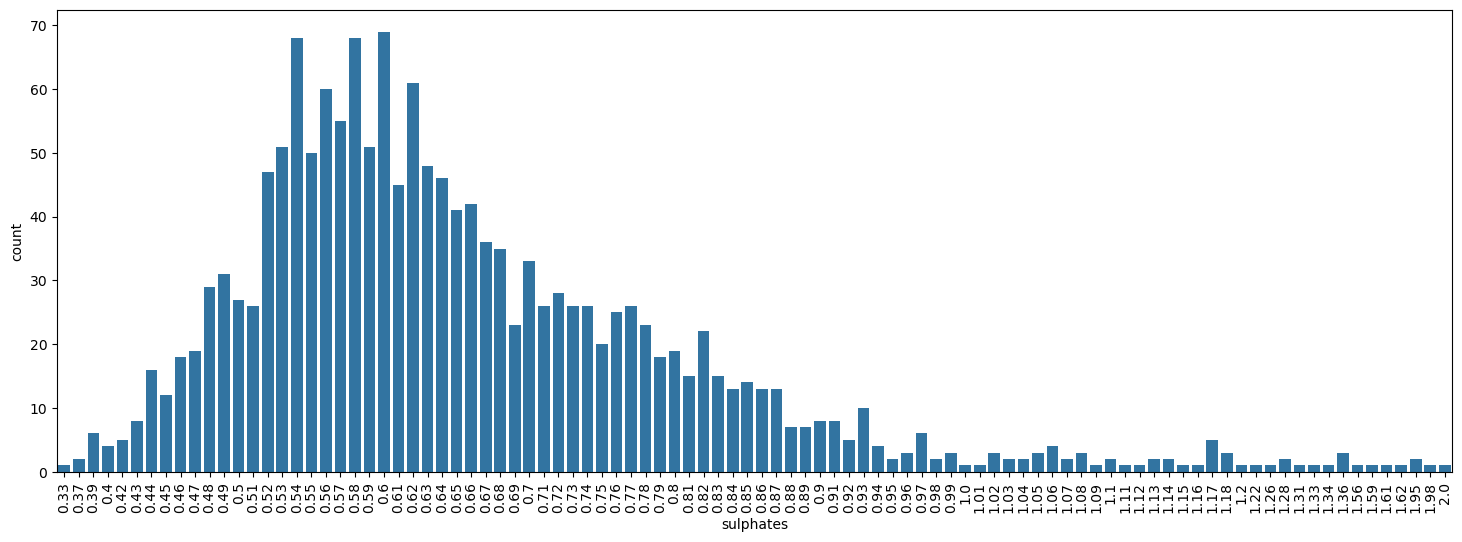

In [226]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6)) 
sns.countplot(
    data=df,
    x='sulphates'
)

plt.xticks(rotation=90)
plt.show()

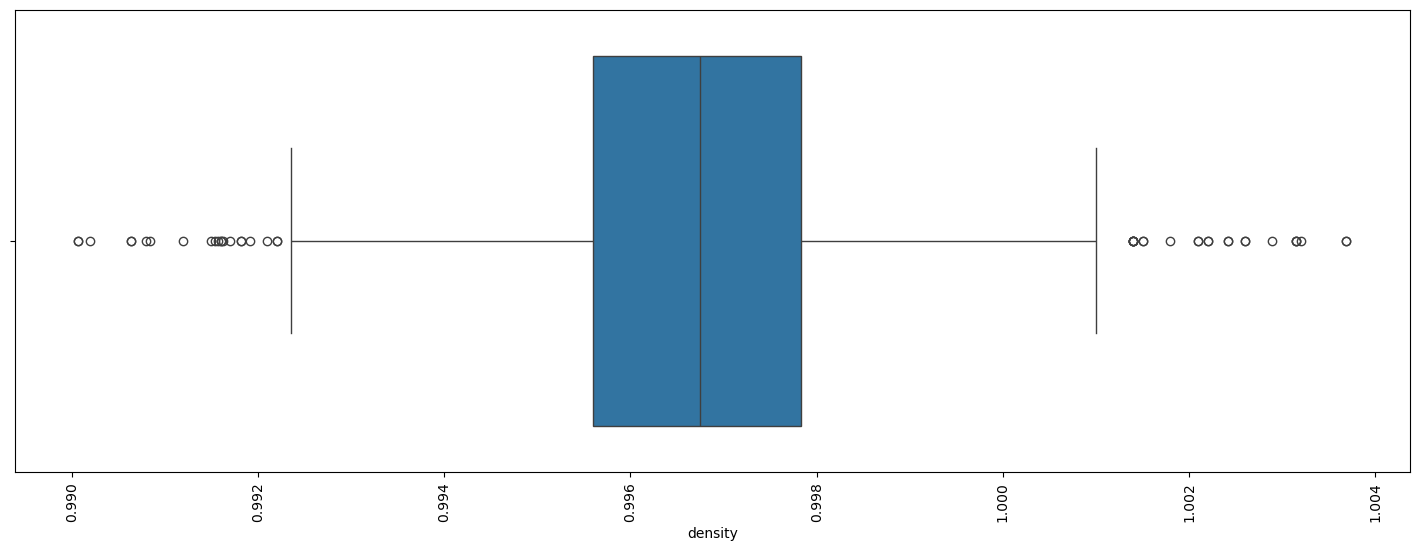

In [227]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6)) 
sns.boxplot(
    data=df,
    x='density'
)

plt.xticks(rotation=90)
plt.show()

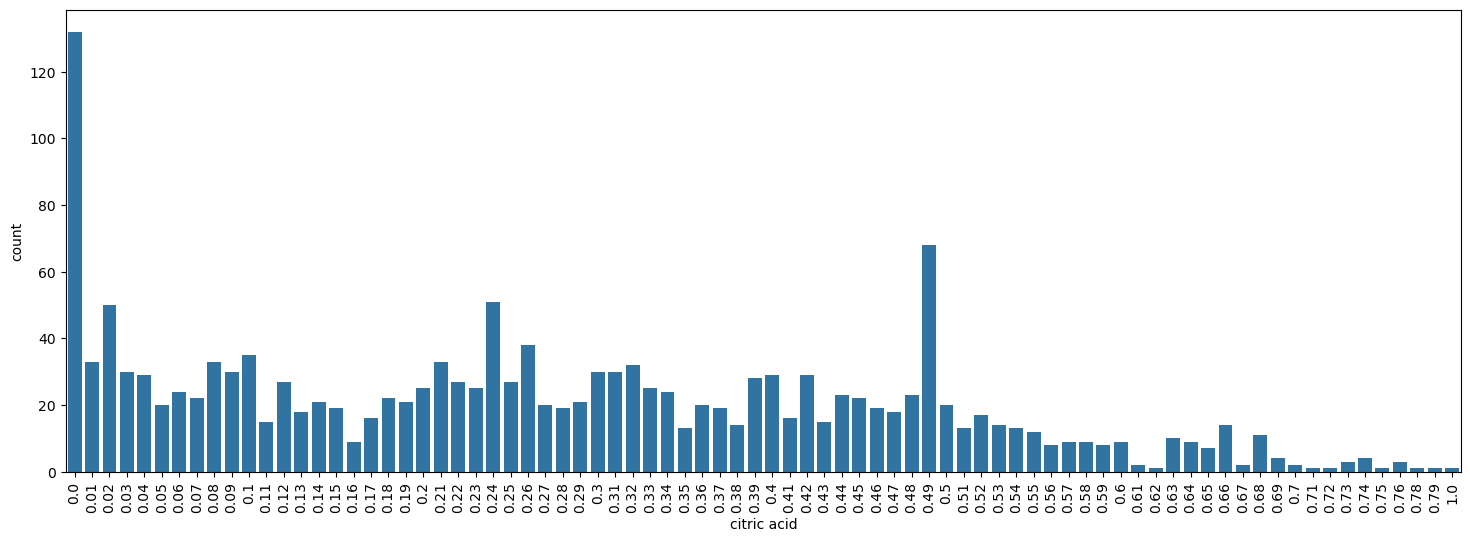

In [228]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6)) 
sns.countplot(
    data=df,
    x='citric acid'
)

plt.xticks(rotation=90)
plt.show()

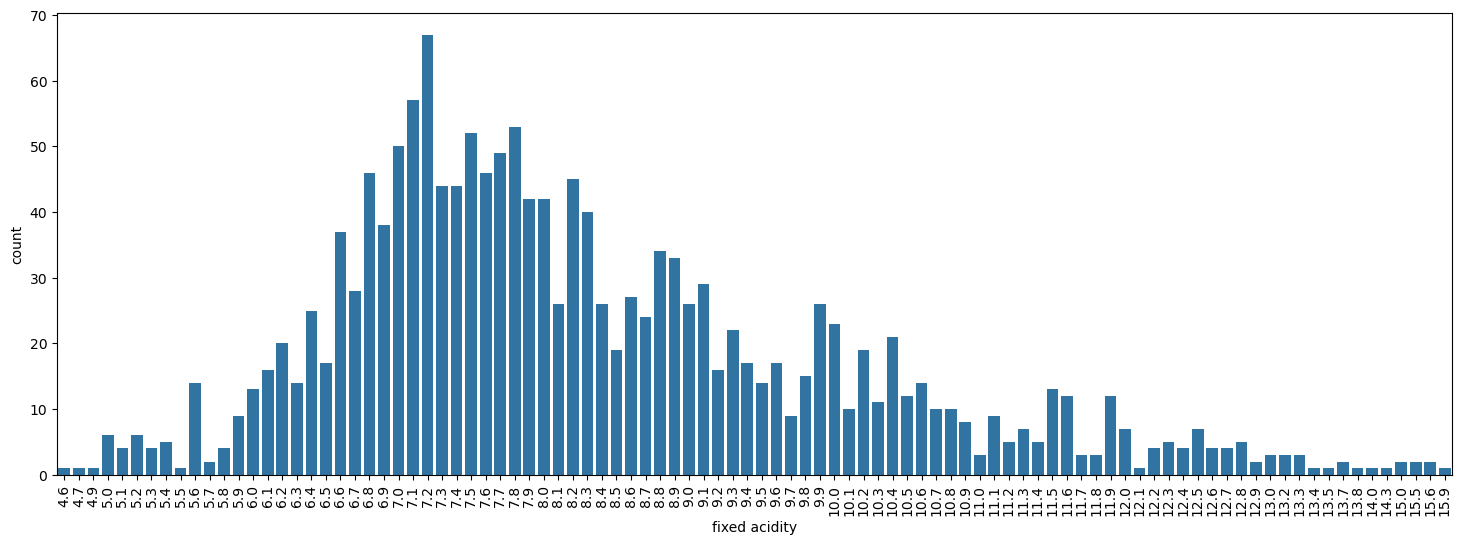

In [229]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6)) 
sns.countplot(
    data=df,
    x='fixed acidity'
)

plt.xticks(rotation=90)
plt.show()

## Preprocessing

In [230]:
# df = df[[ 'volatile acidity',
#          'total sulfur dioxide',
#         'sulphates', 'alcohol', 'quality']]

In [316]:
# df['new_quality'] = df['quality'].apply(lambda x:1 if x > 5.5 else 0)
df['new_quality'] = df['quality'].apply(lambda x: 1 if x < 5 else (2 if x <= 5.5 else 3))


In [317]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [318]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'new_quality'],
      dtype='object')

In [319]:
x = df.drop(['quality'],axis=1)
y = df['quality']

In [320]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test  = train_test_split(x,y, test_size=0.30, random_state=42)

In [321]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=25, random_state=42,min_samples_split=10, min_samples_leaf=25)

In [322]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=25, min_samples_split=10,
                       random_state=42)

In [323]:
y_train_pred_tree = tree.predict(x_train)
y_test_pred_tree = tree.predict(x_test)

In [324]:
from sklearn.metrics import accuracy_score

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)
print("Accuracy of Decision on train Tree Classifier: ", train_accuracy_tree)
print("Accuracy of Decision on test Tree Classifier: ", test_accuracy_tree)


Accuracy of Decision on train Tree Classifier:  0.8873994638069705
Accuracy of Decision on test Tree Classifier:  0.8541666666666666


<Axes: >

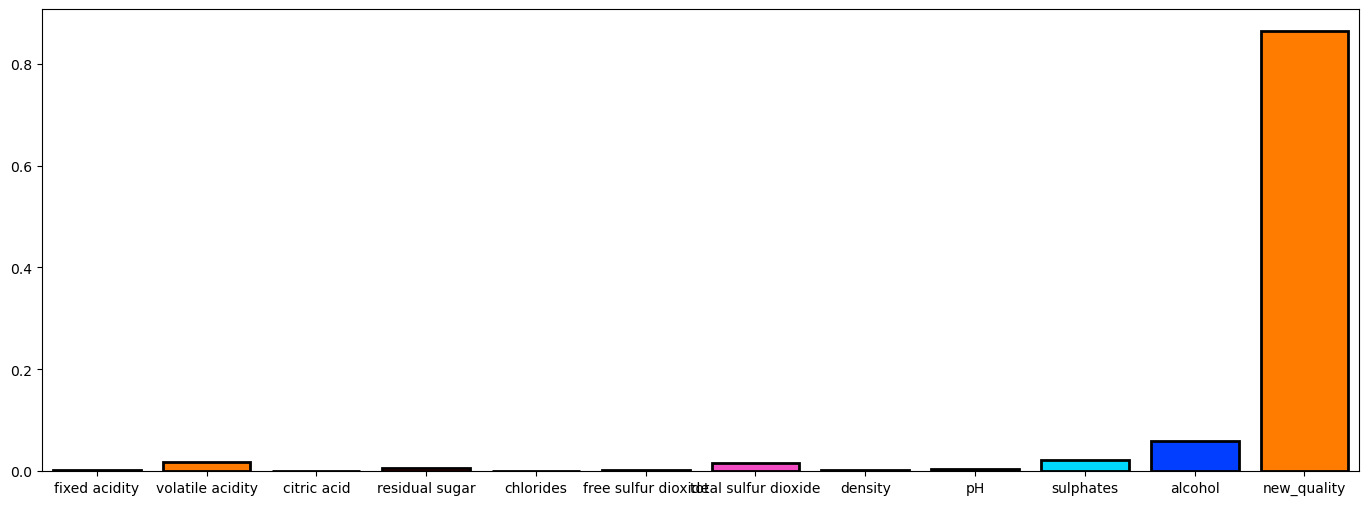

In [325]:

importances = tree.feature_importances_
columns = x.columns
data = pd.DataFrame([importances], columns=columns)
plt.figure(figsize=(17, 6)) 
sns.barplot(data,
            palette = 'bright',
            saturation = 2.0,
            edgecolor = 'black',
            linewidth = 2)
    # plt.title('Importancia de cada feature')
# plt.show()

____

### random forest

In [326]:

from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=00000) 


In [327]:
from sklearn.ensemble import RandomForestClassifier

rando_forest = RandomForestClassifier(n_estimators=50,random_state=42,min_samples_split=50, min_samples_leaf=30)

In [328]:
rando_forest.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=30, min_samples_split=50,
                       n_estimators=50, random_state=42)

In [329]:
y_train_pred = rando_forest.predict(x_train)
y_test_pred = rando_forest.predict(x_test)

In [330]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train,y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print('El train en train es: ', train_accuracy)
print('El train en test es: ', test_accuracy)


El train en train es:  0.840929401251117
El train en test es:  0.8645833333333334


In [331]:
feature_importances = pd.DataFrame (
    {
        "feature": list(x.columns),
        "importance" : rando_forest.feature_importances_
    }
).sort_values('importance',ascending= False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'new_quality'),
  Text(1, 0, 'alcohol'),
  Text(2, 0, 'sulphates'),
  Text(3, 0, 'volatile acidity'),
  Text(4, 0, 'total sulfur dioxide'),
  Text(5, 0, 'citric acid'),
  Text(6, 0, 'density'),
  Text(7, 0, 'chlorides'),
  Text(8, 0, 'residual sugar'),
  Text(9, 0, 'fixed acidity'),
  Text(10, 0, 'pH'),
  Text(11, 0, 'free sulfur dioxide')])

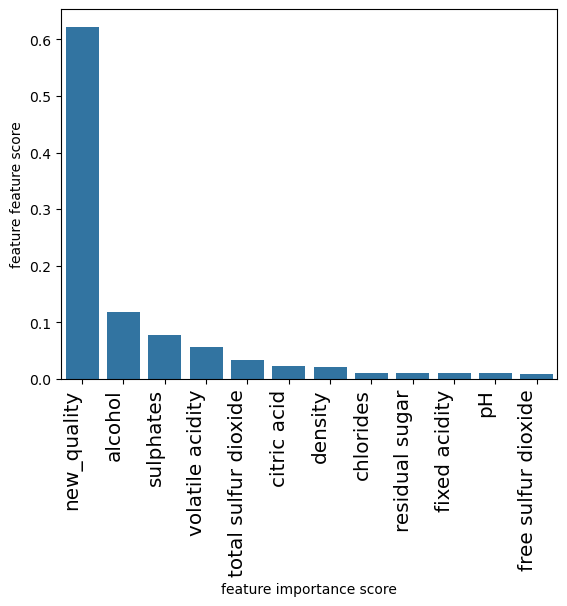

In [332]:
sns.barplot (
    data= feature_importances,
    x = 'feature',
    y='importance'
)
plt.xlabel('feature importance score')
plt.ylabel('feature feature score')
plt.xticks(rotation = 90,horizontalalignment ='right',fontsize='x-large')